In [11]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


In [12]:

# Load arrays from the saved .npy files
time = np.load("/Users/adaciortan/Desktop/experiment data/daca ai fii un stick/the column/2025-11-11_h2-200bar_SRB-time.npy")
volume_1 = np.load("/Users/adaciortan/Desktop/experiment data/daca ai fii un stick/the column/2025-11-11_h2-200bar_SRB-volume_1.npy")
volume_2 = np.load("/Users/adaciortan/Desktop/experiment data/daca ai fii un stick/the column/2025-11-11_h2-200bar_SRB-volume_2.npy")




In [4]:
#integrate leak rates if relevant
#integrate leak data
leak_rate1a= 3.12E-07
leak_rate2a= 2.11E-06
trend1a= leak_rate1a * time
trend2a= leak_rate2a * time
volume_1= volume_1 - trend1a
volume_2= volume_2 - trend2a


In [13]:
def convert_to_moles_and_days(time_array, vol1_array, vol2_array, density, molar_mass):
    """
    Converts Time from minutes to days.
    Converts Volume to Moles using: Volume * (Density / Molar Mass)
    """
    # 1. Convert Time (Minutes -> Days)
    time_days = time_array / 1440.0
    
    # 2. Calculate conversion factor
    # Mass = Volume * Density
    # Moles = Mass / Molar Mass
    conversion_factor = density / molar_mass
    
    # 3. Convert Volumes to Moles
    moles_1 = vol1_array * conversion_factor
    moles_2 = vol2_array * conversion_factor
    
    return time_days, moles_1, moles_2




In [14]:
#here add density(kg/m^3) and molar mass (g/mol) for density ad different P and T go to https://cmb.tech/hydrogen-tools
#output in days and mmol
time_days,moles_1, moles_2=convert_to_moles_and_days(time,volume_1,volume_2,density=7.397,molar_mass=2.016) 

In [15]:
prov_cum_min = np.multiply(np.arange(0, 18324),1/1440)
time_days=prov_cum_min


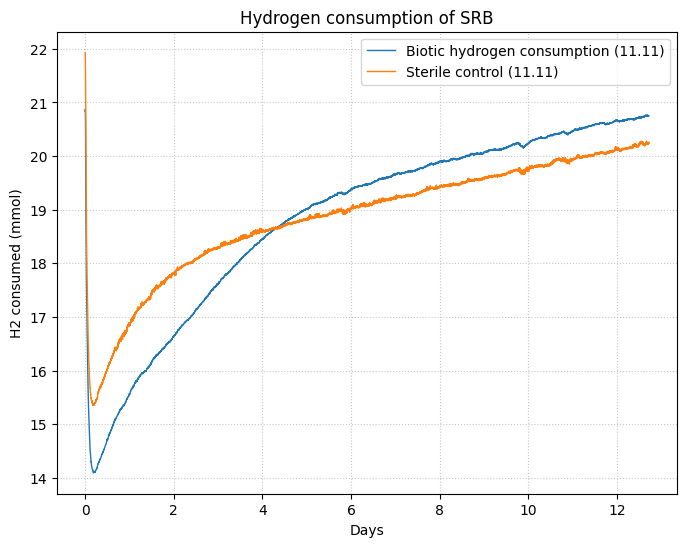

In [16]:

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(time_days, moles_1, label="Biotic hydrogen consumption (11.11)", linewidth=1)
plt.plot(time_days, moles_2, label="Sterile control (11.11)", linewidth=1,)

# Labels and legend
plt.xlabel("Days")
plt.ylabel("H2 consumed (mmol)")
plt.title("Hydrogen consumption of SRB")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)

# Show the plot
plt.show()


In [17]:

def trim_and_zero_arrays(a, b, c):
    """
    1. Finds the index of the minimum value in array 'a' (ignoring NaNs).
    2. Trims a, b, and c to start from that index.
    3. Shifts 'a' and 'b' so their minimum values become 0 (ignoring NaNs).
    """
    
    # 1. Find the index of the lowest value in 'a'
    # We use nanargmin to ignore the gap we created earlier
    idx = np.nanargmin(a)

    # 2. Slice (Trim) all arrays from that index onwards
    a_trim = a[idx:]
    b_trim = b[idx:]
    c_trim = c[idx:]

    # 3. Shift 'a' and 'b' so they start at 0
    # Use nanmin so the 'gap' doesn't break the subtraction
    a_final = a_trim - np.nanmin(a_trim)
    b_final = b_trim - np.nanmin(b_trim)
    
    c_final = c_trim

    return a_final, b_final, c_final, idx


# Run the function
# We treat 'a_input' as the reference for finding the cut point
moles_1_trimmed, moles_2_trimmed, time_days_trimmed, cut_index = trim_and_zero_arrays(moles_1, moles_2,time_days )



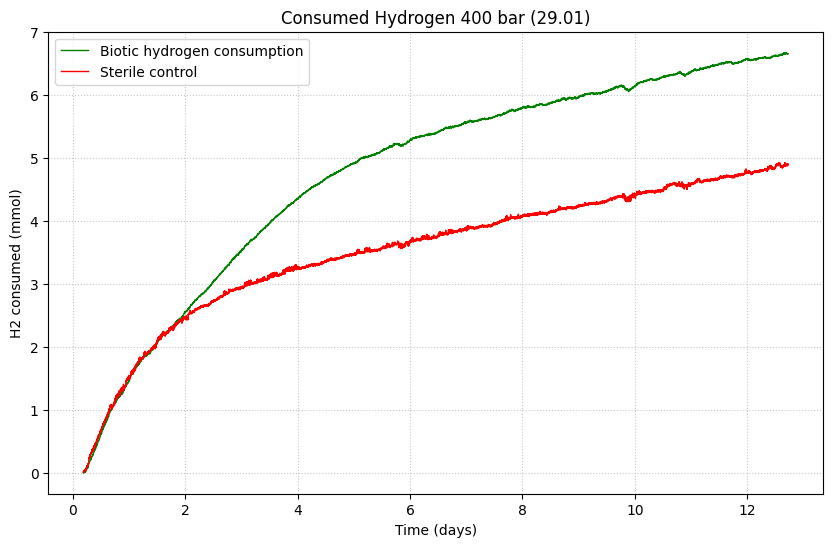

In [18]:
## plot with removed expansion and normalized to zero


# Create the plot
plt.figure(figsize=(10,6))
plt.plot(time_days_trimmed, moles_1_trimmed, label="Biotic hydrogen consumption", linewidth=1,color="green")
plt.plot(time_days_trimmed,moles_2_trimmed, label="Sterile control", linewidth=1,color="red")
#plt.plot(th_cum_min_2, th_c_vol1_2, label="Biotic hydrogen consumption(01.07)", linewidth=1, color="green")
#plt.plot(th_cum_min_2, th_c_vol2_2, label="Sterile control (01.07)", linewidth=1,color="red")
#plt.plot(h_cum_min_1, h_c_vol1_1, label="Volume change with SRB (18.06)", linewidth=1)
#plt.plot(h_cum_min_1, h_c_vol2_1, label="Only Medium (18.06)", linewidth=1,)
# Labels and legend
plt.xlabel("Time (days)")
plt.ylabel("H2 consumed (mmol)")
plt.title("Consumed Hydrogen 400 bar (29.01)") #, Both Experiments
plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)

# Show the plot
plt.show()


In [19]:
moles_consumed=moles_1_trimmed-moles_2_trimmed
time= time_days_trimmed

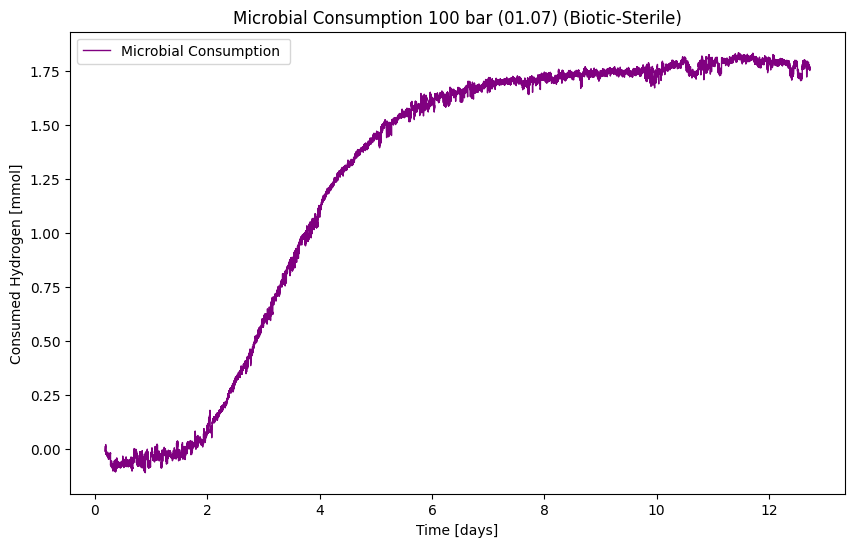

In [20]:

plt.figure(figsize=(10,6))
plt.plot(time, moles_consumed, label="Microbial Consumption ", linewidth=1, color="purple")
#plt.plot(th_cum_min_2,th_c_vol2_3, label="Microbial Consumption (01.07)", linewidth=1, color="blue")


plt.xlabel("Time [days]")
plt.ylabel("Consumed Hydrogen [mmol]")
plt.legend()
plt.title("Microbial Consumption 100 bar (01.07) (Biotic-Sterile)")
plt.show()

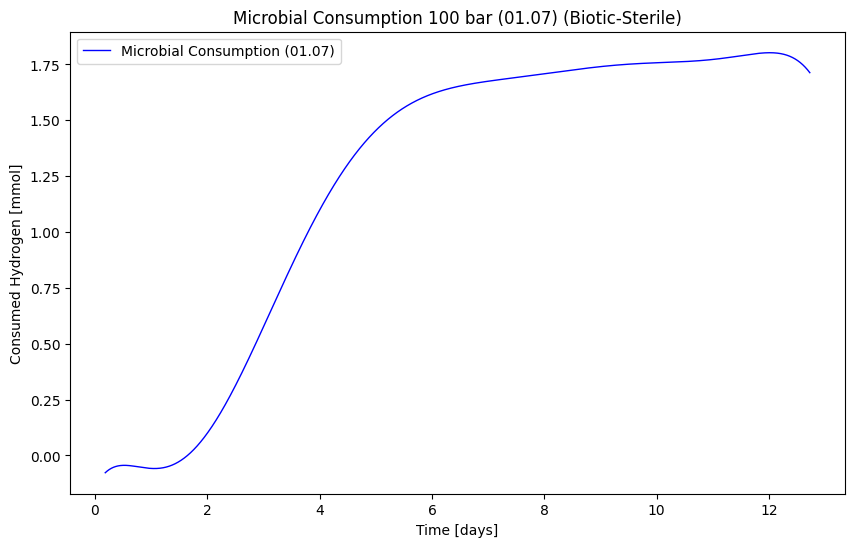

In [53]:
import numpy as np

def fit_line(x_data, y_data, degree):
    """
    Fits a polynomial line to a dataset.
    Default degree is 1 (straight line: y = mx + b).
    """
    # 1. Calculate the coefficients using Least Squares
    # For degree=1, this returns [slope (m), y-intercept (b)]
    coefficients = np.polyfit(x_data, y_data, degree)
    
    # 2. Create a polynomial function from these coefficients
    # This makes it easy to plug in any 'x' and get the fitted 'y'
    trendline_func = np.poly1d(coefficients)
    
    # 3. Generate the fitted y-values for the original x_data
    y_fitted = trendline_func(x_data)
    
    return coefficients, y_fitted, trendline_func

# --- Example Usage ---
# x = np.array([0, 1, 2, 3, 4, 5])
# y = np.array([2.1, 3.9, 6.2, 8.0, 9.9, 12.1])
coeffs8, fitted_data8, line_equation8 = fit_line(time, moles_consumed, degree=3)
coeffs1, fitted_data1, line_equation1 = fit_line(time, moles_consumed,degree=8 )
# print(f"Equation of the line: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}")

plt.figure(figsize=(10,6))
#plt.plot(time, moles_consumed, label="Microbial Consumption ", linewidth=1, color="purple")
plt.plot(time,fitted_data1, label="Microbial Consumption (01.07)", linewidth=1, color="blue")


plt.xlabel("Time [days]")
plt.ylabel("Consumed Hydrogen [mmol]")
plt.legend()
plt.title("Microbial Consumption 100 bar (01.07) (Biotic-Sterile)")
plt.show()


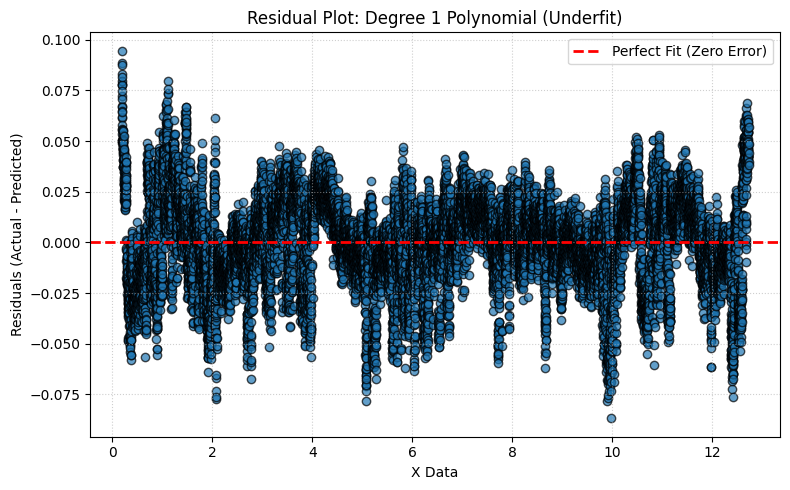

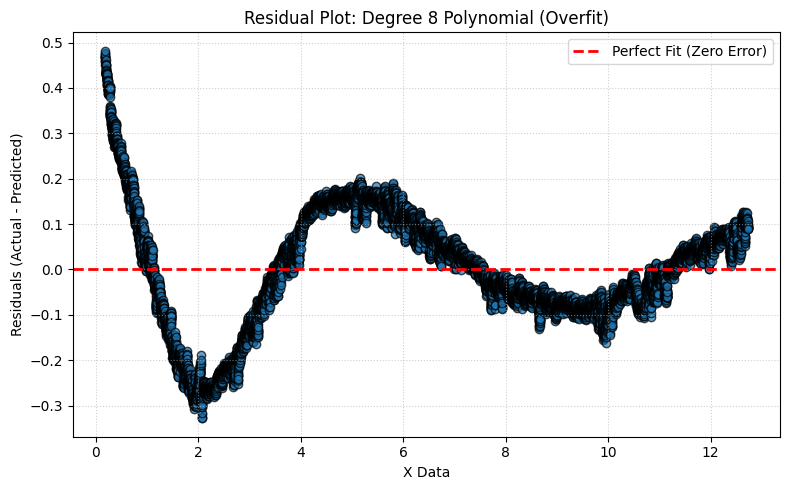

In [54]:
def plot_residuals(x, y_actual, y_predicted, model_name="Model"):
    """
    Calculates and plots the residuals (errors) of a fitted model.
    """
    # 1. Calculate the residuals
    residuals = y_actual - y_predicted
    
    # 2. Create the scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, residuals, color='tab:blue', alpha=0.7, edgecolor='black')
    
    # 3. Add the zero-error reference line
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Perfect Fit (Zero Error)')
    
    # 4. Format the plot for readability
    plt.title(f"Residual Plot: {model_name}")
    plt.xlabel("X Data")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
    return residuals

# --- Example: Testing Degree 1 vs Degree 8 ---
if __name__ == "__main__":
    # Generate some fake curvy data with noise
    x_test = time
    y_actual = moles_consumed
    
    # Fit a degree 1 (straight line) and a degree 8 polynomial
    coeffs_deg1 = np.polyfit(x_test, y_actual, 1)
    coeffs_deg8 = np.polyfit(x_test, y_actual, 8)
    
    y_pred_deg1 = fitted_data1
    y_pred_deg8 = fitted_data8
    
    # Plot the residuals for both
    # Run these one at a time to see the difference!
    plot_residuals(x_test, y_actual, y_pred_deg1, "Degree 1 Polynomial (Underfit)")
    plot_residuals(x_test, y_actual, y_pred_deg8, "Degree 8 Polynomial (Overfit)")

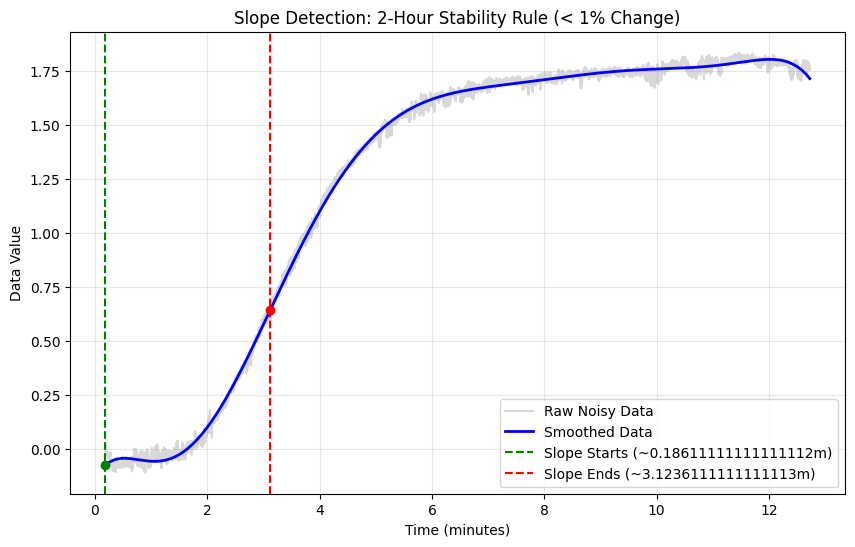

In [ ]:


def detect_slope_bounds(time, data, window_mins=180, threshold=0.05):
    """
    Identifies the start and end of a slope in noisy data.
    
    Parameters:
    - time: Array of time values in minutes.
    - data: Array of noisy data values.
    - window_mins: The span to check for stability (default 120 mins).
    - threshold: Relative change in slope (0.01 = 1%).
    """
    
    # 1. Smooth the data to handle noise (Savitzky-Golay filter)
    # Window length must be odd; 51 is a good starting point for 1min intervals
    smoothed = savgol_filter(data, window_length=71, polyorder=3)
    
    # 2. Calculate the slope (dy/dt)
    slopes = np.gradient(smoothed, time)
    
    start_idx = None
    end_idx = None
    
    # 3. Find Start: first point where slope is significantly non-zero
    # (Defined here as 10% of the maximum observed slope)
    max_slope = np.max(np.abs(slopes))
    start_threshold = max_slope * 0.1
    for i in range(len(slopes)):
        if abs(slopes[i]) > start_threshold:
            start_idx = i
            break
            
    # 4. Find End: 2-hour window where the average change in slope is < 1%
    # We iterate from the start point onwards
    if start_idx is not None:
        for i in range(start_idx, len(slopes) - window_mins):
            # Get the slope at the start and end of the 2-hour window
            m_now = slopes[i]
            m_future = slopes[i + window_mins]
            
            # Calculate relative change
            if abs(m_now) > 1e-6:
                rel_change = abs((m_future - m_now) / m_now)
            else:
                rel_change = 0 # If slope is effectively zero, it has ended
            
            # Check if change is less than 1% (0.01)
            # We look for this after the slope has passed its peak
            if rel_change < threshold and i > np.argmax(np.abs(slopes)):
                end_idx = i
                break
                
    return start_idx, end_idx, smoothed

# --- Example Usage & Plotting ---

start, end, y_smooth = detect_slope_bounds(time,fitted_data1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, moles_consumed, label='Raw Noisy Data', color='gray', alpha=0.3)
plt.plot(time, y_smooth, label='Smoothed Data', color='blue', linewidth=2)

if start is not None:
    plt.axvline(time[start], color='green', linestyle='--', label=f'Slope Starts (~{time[start]}m)')
    plt.scatter(time[start], y_smooth[start], color='green', zorder=5)

if end is not None:
    plt.axvline(time[end], color='red', linestyle='--', label=f'Slope Ends (~{time[end]}m)')
    plt.scatter(time[end], y_smooth[end], color='red', zorder=5)

plt.title("Slope Detection: 2-Hour Stability Rule (< 1% Change)")
plt.xlabel("Time (minutes)")
plt.ylabel("Data Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Calculating second derivative peaks on raw input...
Success! Found 3 significant peaks (edges ignored).


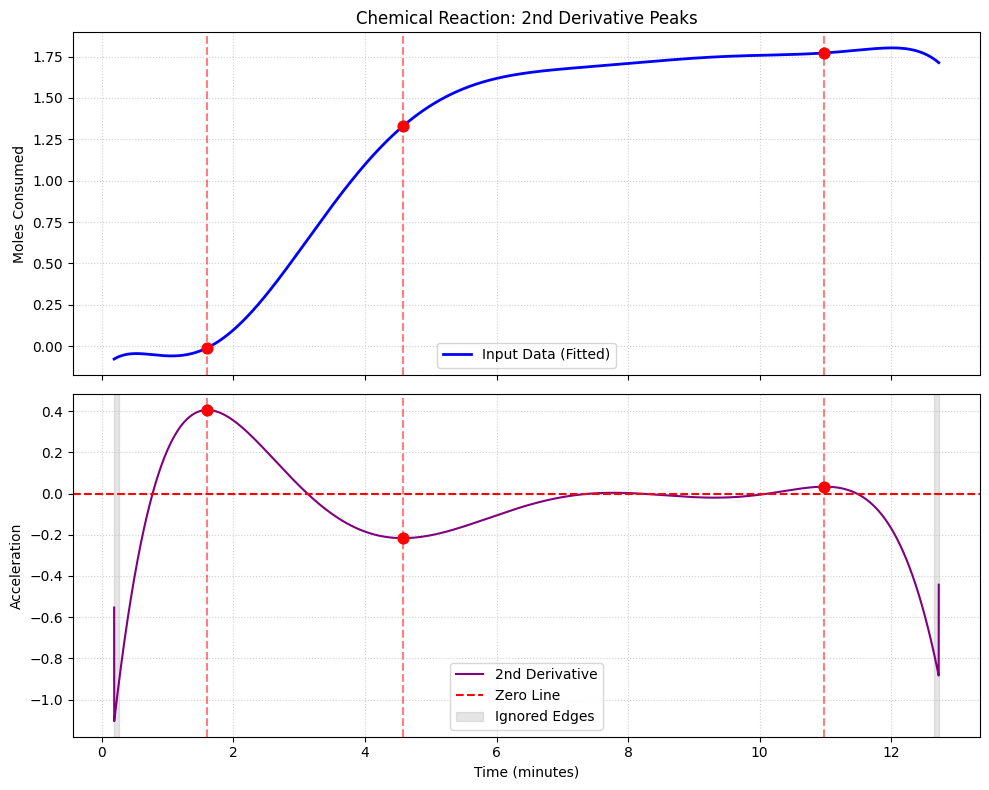

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def find_second_derivative_peaks_raw(time, y, prominence_factor=0.1, edge_buffer=50):
    """
    Finds the significant peaks of the 2nd derivative on data without pre-smoothing.
    - prominence_factor: Filters out tiny noise peaks based on max acceleration.
    - edge_buffer: Number of points at the start and end to strictly ignore.
    """
    # 1. Calculate Derivatives directly on the input data
    dy_dt = np.gradient(y, time)
    d2y_dt2 = np.gradient(dy_dt, time)
    
    # 2. Calculate dynamic prominence threshold
    threshold = np.max(np.abs(d2y_dt2)) * prominence_factor
    
    # 3. Find Positive and Negative Peaks
    pos_peaks, _ = find_peaks(d2y_dt2, prominence=threshold)
    neg_peaks, _ = find_peaks(-d2y_dt2, prominence=threshold)
    
    # Combine and sort all peak indices chronologically
    all_peaks = np.sort(np.concatenate((pos_peaks, neg_peaks)))
    
    # 4. IGNORE THE BEGINNING AND END
    # Keep only peaks that are strictly inside the safe middle zone
    valid_mask = (all_peaks >= edge_buffer) & (all_peaks < (len(y) - edge_buffer))
    filtered_peaks = all_peaks[valid_mask]
            
    return filtered_peaks, d2y_dt2

# --- Safe Plotting Block ---
if __name__ == "__main__":
    # Load your actual data arrays here
    # Make sure 'time' and 'fitted_data1' are defined in your environment
    x_data = time
    y_data = fitted_data1
    
    print("Calculating second derivative peaks on raw input...")
    
    # Using an edge_buffer of 100 to ignore the first/last 100 points
    valid_peaks, second_deriv = find_second_derivative_peaks_raw(
        x_data, y_data, prominence_factor=0.1, edge_buffer=100
    )
    
    print(f"Success! Found {len(valid_peaks)} significant peaks (edges ignored).")
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Top Plot (Just the input data now, no smoothed line)
    ax1.plot(x_data, y_data, color='blue', linewidth=2, label='Input Data (Fitted)')
    ax1.set_title("Chemical Reaction: 2nd Derivative Peaks")
    ax1.set_ylabel("Moles Consumed")
    ax1.grid(True, linestyle=':', alpha=0.6)
    
    # Bottom Plot
    ax2.plot(x_data, second_deriv, color='purple', label='2nd Derivative')
    ax2.axhline(0, color='red', linestyle='--', label='Zero Line')
    
    # Shade the ignored edge regions on the bottom plot
    ax2.axvspan(x_data[0], x_data[100], color='gray', alpha=0.2, label='Ignored Edges')
    ax2.axvspan(x_data[-100], x_data[-1], color='gray', alpha=0.2)
    
    ax2.set_xlabel("Time (minutes)")
    ax2.set_ylabel("Acceleration")
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    # Safely mark ONLY the valid peaks
    if len(valid_peaks) > 0:
        ax1.scatter(x_data[valid_peaks], y_data[valid_peaks], color='red', s=60, zorder=5)
        ax2.scatter(x_data[valid_peaks], second_deriv[valid_peaks], color='red', s=60, zorder=5)
        
        # Only draw vertical lines if there are fewer than 50
        if len(valid_peaks) < 50:
            for idx in valid_peaks:
                ax1.axvline(x_data[idx], color='red', linestyle='--', alpha=0.5)
                ax2.axvline(x_data[idx], color='red', linestyle='--', alpha=0.5)
        else:
            print("Warning: Too many points! Skipping vertical lines to prevent graph freezing.")

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

Point A: Time = 1.6, Moles = -0.01
Point B: Time = 4.6, Moles = 1.33
Average Reaction Rate (Slope): 0.4505 moles/min


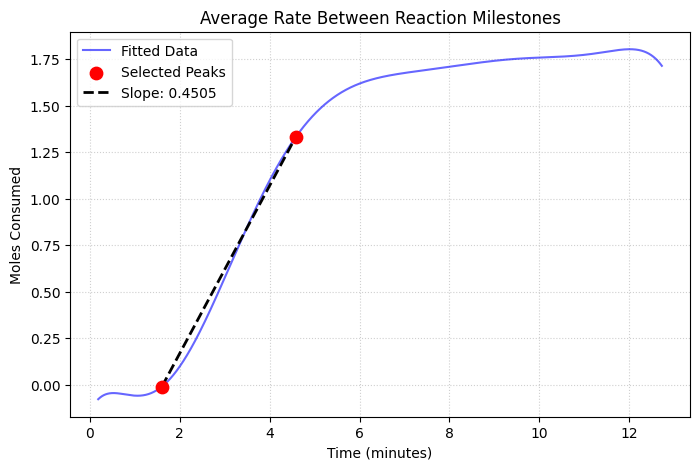

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_slope_between_indices(time, y, idx1, idx2):
    """
    Calculates the slope (moles consumed per minute) between two specific indices.
    """
    # Extract the actual coordinates from the arrays
    x1, y1 = time[idx1], y[idx1]
    x2, y2 = time[idx2], y[idx2]
    
    # Safety check to prevent division by zero
    if x2 == x1:
        print("Warning: Both points have the same timestamp. Slope is undefined.")
        return 0.0, (x1, y1), (x2, y2)
        
    # Standard slope formula: (y2 - y1) / (x2 - x1)
    slope = (y2 - y1) / (x2 - x1)
    
    return slope, (x1, y1), (x2, y2)

# --- Example of How to Use It with Your Peaks ---
if __name__ == "__main__":
    # Let's assume you just ran the peak finder and got these arrays:
    # x_data = time
    # y_data = fitted_data1
    # valid_peaks = [150, 420] # Example indices returned by the previous function
    
    # Just creating some dummy data for the sake of a runnable example
    x_data = time
    y_data = fitted_data1
    
    # Check if we actually have at least two peaks to connect
    if len(valid_peaks) >= 2:
        # Grab the first two peaks
        index_A = valid_peaks[0]
        index_B = valid_peaks[1]
        
        # Calculate the slope
        reaction_rate, ptA, ptB = calculate_slope_between_indices(x_data, y_data, index_A, index_B)
        
        print(f"Point A: Time = {ptA[0]:.1f}, Moles = {ptA[1]:.2f}")
        print(f"Point B: Time = {ptB[0]:.1f}, Moles = {ptB[1]:.2f}")
        print(f"Average Reaction Rate (Slope): {reaction_rate:.4f} moles/min")
        
        # --- Visual Verification ---
        plt.figure(figsize=(8, 5))
        plt.plot(x_data, y_data, color='blue', alpha=0.6, label='Fitted Data')
        
        # Mark the two points
        plt.scatter([ptA[0], ptB[0]], [ptA[1], ptB[1]], color='red', s=80, zorder=5, label='Selected Peaks')
        
        # Draw the secant line connecting them
        plt.plot([ptA[0], ptB[0]], [ptA[1], ptB[1]], color='black', linestyle='--', linewidth=2, label=f'Slope: {reaction_rate:.4f}')
        
        plt.title("Average Rate Between Reaction Milestones")
        plt.xlabel("Time (minutes)")
        plt.ylabel("Moles Consumed")
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.show()
    else:
        print("Not enough peaks found to calculate a slope between two points.")

In [49]:
import numpy as np

def daily_volume_rate(a: np.ndarray, b: np.ndarray):
    """
    Calculate daily volume change rates from volume (a) and time in days (b).

    Parameters
    ----------
    a : np.ndarray
        Array of volume values.
    b : np.ndarray
        Array of time values (days), same length as a.

    Returns
    -------
    rates : np.ndarray
        Array of daily rates (Δvolume / Δtime per day).
        If a day has only one point, the rate is NaN.
    """

    if len(a) != len(b):
        raise ValueError("Arrays a and b must have the same length")

    if len(a) == 0:
        return np.array([])

    # Floor times to group into days
    day_bins = np.floor(b).astype(int)
    unique_days = np.unique(day_bins)

    rates = []

    for day in unique_days:
        mask = day_bins == day
        a_day = a[mask]
        b_day = b[mask]

        if len(a_day) == 1:
            # Only one point → cannot compute slope
            rates.append(np.nan)
        else:
            # Linear fit (slope = rate of change per day)
            slope, _ = np.polyfit(b_day, a_day, 1)
            rates.append(slope)

    return np.array(rates)


In [55]:
# Example data
rates_1 = daily_volume_rate(fitted_data1, time)
#rates_2 = daily_volume_rate(th_c_vol2_3, th_cum_min_2)
print("Rates per day:", rates_1)


Rates per day: [ 0.00619255  0.15488293  0.48134937  0.52712535  0.35683063  0.16204441
  0.05546192  0.03298919  0.03239573  0.0171451   0.01402287  0.03318202
 -0.11477263]
